In [63]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore
from scipy.stats import ttest_ind


import numpy as np
from pandas.plotting import scatter_matrix


### Data Understanding

In [53]:
csv_data = pd.read_csv(r'C:\Users\MSI\Documents\start\Solar_Radiation_Measurement_Data_Analysis\dataset\solar-measurements_zambia-fig-tree_ifc_qc.csv')

csv_data['time'] = pd.to_datetime(csv_data['time'])


csv_data.rename(columns={
    'dhi_pyr': 'DHI',
    'ghi_pyr_1': 'GHI',
    'air_temperature': 'Tamb',
    'gti_clean': 'ModA',
    'gti_soil': 'ModB',
    'wind_speed': 'WS',
    'relative_humidity': 'RH',
    'barometric_pressure': 'BP',
    'wind_from_direction': 'WD',
    'sensor_cleaning': 'Cleaning',
}, inplace=True)

# Set the time column as the index
csv_data.set_index('time', inplace=True)



C:\Users\MSI\AppData\Local\Temp\ipykernel_4228\3308244661.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  csv_data = pd.read_csv(r'C:\Users\MSI\Documents\start\Solar_Radiation_Measurement_Data_Analysis\dataset\solar-measurements_zambia-fig-tree_ifc_qc.csv')


In [54]:
print(csv_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 550080 entries, 2017-08-15 00:01:00 to 2018-09-01 00:00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   DHI            548875 non-null  float64
 1   GHI            550054 non-null  float64
 2   ghi_pyr_2      550054 non-null  float64
 3   Tamb           550054 non-null  float64
 4   RH             550054 non-null  float64
 5   BP             550054 non-null  float64
 6   precipitation  550054 non-null  float64
 7   WS             550054 non-null  float64
 8   WD             550054 non-null  float64
 9   ModA           550054 non-null  float64
 10  ModB           550054 non-null  float64
 11  Cleaning       550054 non-null  float64
 12  comments       1205 non-null    object 
dtypes: float64(12), object(1)
memory usage: 58.8+ MB
None


### Summary Statistics

In [55]:
summary_stats = csv_data.describe()
print(summary_stats)


                 DHI            GHI      ghi_pyr_2           Tamb  \
count  548875.000000  550054.000000  550054.000000  550054.000000   
mean       77.131812     235.661466     233.901828      20.488666   
std       117.531753     334.344013     332.016837       6.231868   
min         0.000000       0.000000       0.000000       1.000000   
25%         0.000000       0.000000       0.000000      16.960000   
50%         2.580000       2.590000       2.510000      20.570000   
75%       115.340000     428.897500     425.570000      24.920000   
max       799.500000    1624.000000    1613.300000      39.920000   

                  RH             BP  precipitation             WS  \
count  550054.000000  550054.000000  550054.000000  550054.000000   
mean       69.262470     889.126571       0.001348       2.608212   
std        25.165622       3.259002       0.027198       1.593271   
min         8.150000     879.430000       0.000000       0.000000   
25%        48.330000     886.7000

### Data Quality Check

In [ ]:
missing_values = csv_data.isnull().sum()
print(missing_values)

# For outliers using IQR
Q1 = csv_data.quantile(0.25)
Q3 = csv_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((csv_data < (Q1 - 1.5 * IQR)) | (csv_data > (Q3 + 1.5 * IQR))).sum()
print(outliers)


### Time Series Analysis

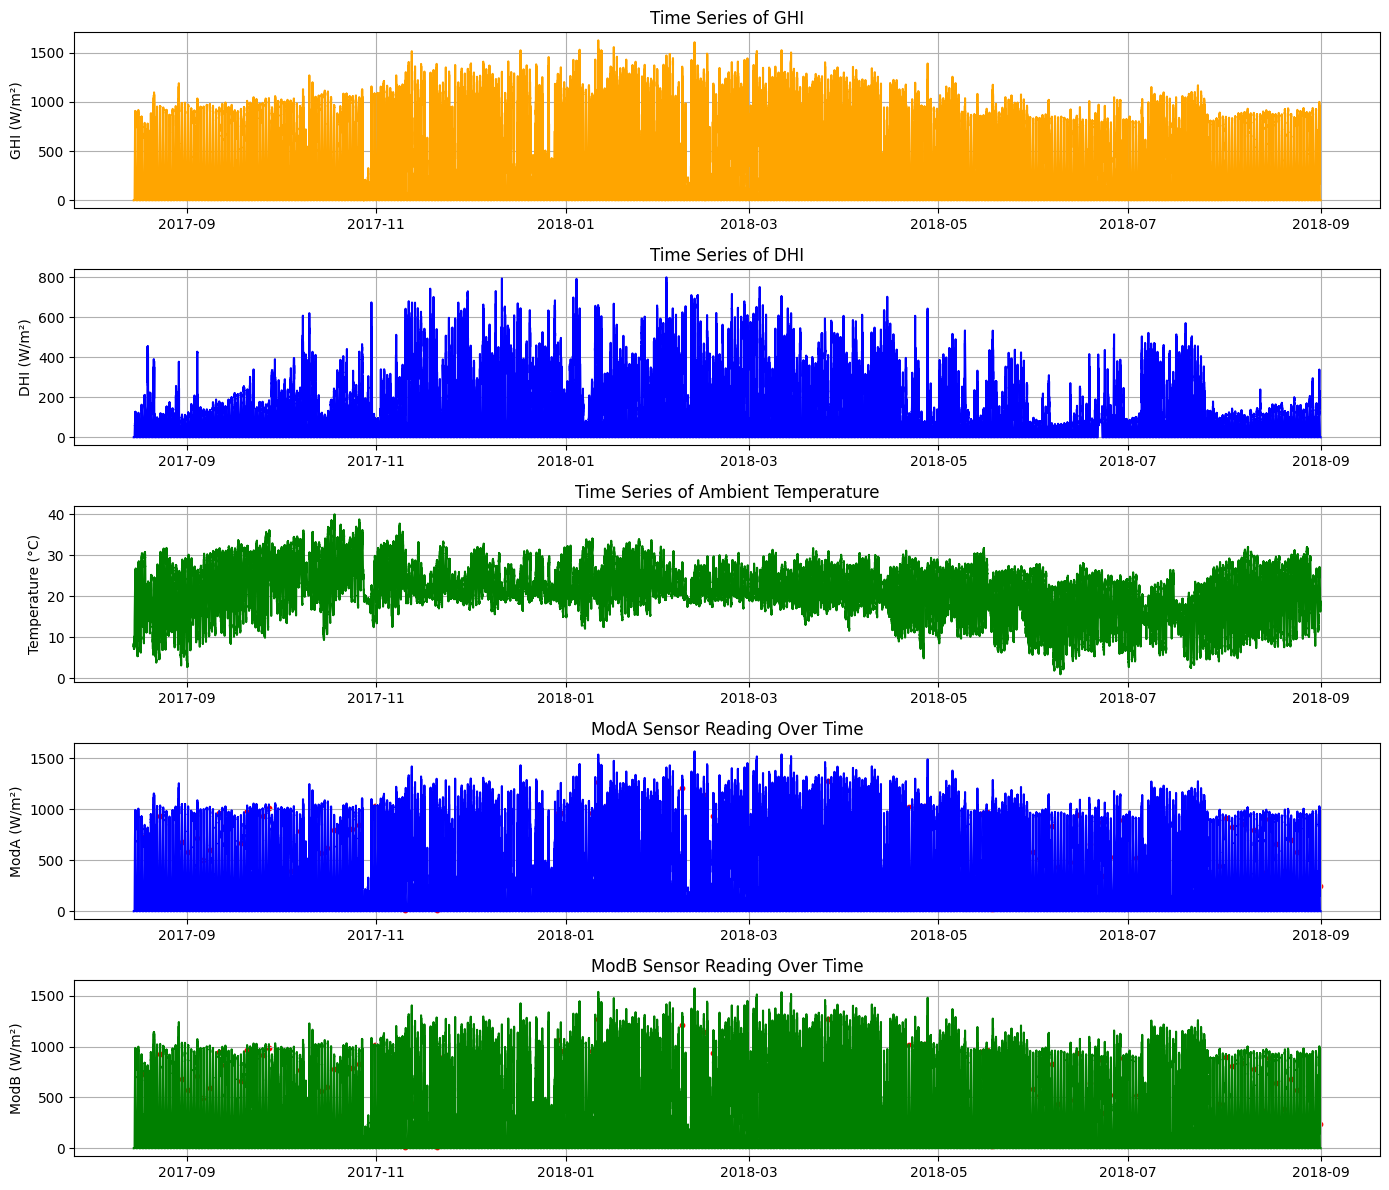

Mean sensor readings before cleaning:
ModA    239.434752
ModB    237.045193
dtype: float64

Mean sensor readings after cleaning:
ModA    582.254490
ModB    577.955646
dtype: float64

T-test for ModA: t-statistic = -12.16, p-value = 0.0000
T-test for ModB: t-statistic = -12.22, p-value = 0.0000


In [56]:
# Adjusting the subplot layout to 5 rows
plt.figure(figsize=(14, 12))

# Plot GHI
plt.subplot(5, 1, 1)
plt.plot(csv_data.index, csv_data['GHI'], label='GHI (Global Horizontal Irradiance)', color='orange')
plt.title('Time Series of GHI')
plt.ylabel('GHI (W/m²)')
plt.grid(True)

# Plot DHI
plt.subplot(5, 1, 2)
plt.plot(csv_data.index, csv_data['DHI'], label='DHI (Diffuse Horizontal Irradiance)', color='blue')
plt.title('Time Series of DHI')
plt.ylabel('DHI (W/m²)')
plt.grid(True)

# Plot Tamb
plt.subplot(5, 1, 3)
plt.plot(csv_data.index, csv_data['Tamb'], label='Ambient Temperature', color='green')
plt.title('Time Series of Ambient Temperature')
plt.ylabel('Temperature (°C)')
plt.grid(True)

# Plot ModA with cleaning events
plt.subplot(5, 1, 4)
plt.plot(csv_data.index, csv_data['ModA'], label='ModA', color='blue')
plt.scatter(csv_data.index[csv_data['Cleaning'] == 1], csv_data['ModA'][csv_data['Cleaning'] == 1], color='red', label='Cleaning Event', s=10)
plt.title('ModA Sensor Reading Over Time')
plt.ylabel('ModA (W/m²)')
plt.grid(True)

# Plot ModB with cleaning events
plt.subplot(5, 1, 5)
plt.plot(csv_data.index, csv_data['ModB'], label='ModB', color='green')
plt.scatter(csv_data.index[csv_data['Cleaning'] == 1], csv_data['ModB'][csv_data['Cleaning'] == 1], color='red', label='Cleaning Event', s=10)
plt.title('ModB Sensor Reading Over Time')
plt.ylabel('ModB (W/m²)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Statistical comparison before and after cleaning
before_cleaning = csv_data[csv_data['Cleaning'] == 0]
after_cleaning = csv_data[csv_data['Cleaning'] == 1]

# Calculate means
mean_before = before_cleaning[['ModA', 'ModB']].mean()
mean_after = after_cleaning[['ModA', 'ModB']].mean()

print("Mean sensor readings before cleaning:")
print(mean_before)

print("\nMean sensor readings after cleaning:")
print(mean_after)

# Optionally, you could perform t-tests or other statistical tests to evaluate significance
t_stat_modA, p_val_modA = ttest_ind(before_cleaning['ModA'], after_cleaning['ModA'], nan_policy='omit')
t_stat_modB, p_val_modB = ttest_ind(before_cleaning['ModB'], after_cleaning['ModB'], nan_policy='omit')

print(f"\nT-test for ModA: t-statistic = {t_stat_modA:.2f}, p-value = {p_val_modA:.4f}")
print(f"T-test for ModB: t-statistic = {t_stat_modB:.2f}, p-value = {p_val_modB:.4f}")


### Correlation Analysis

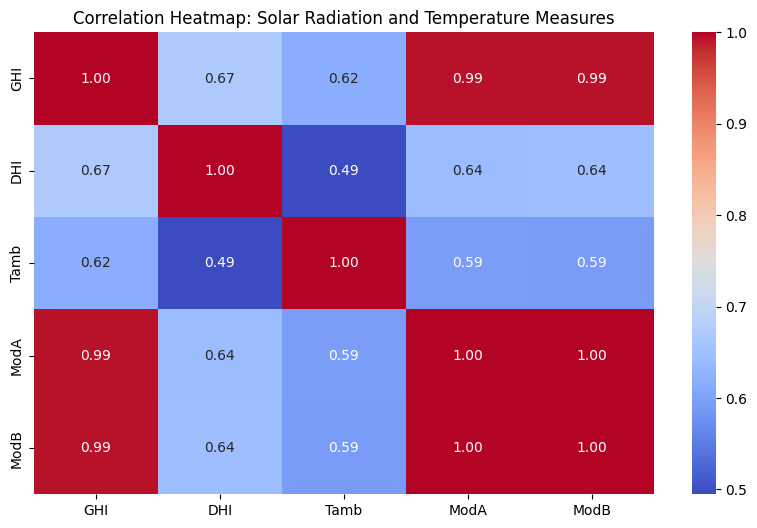

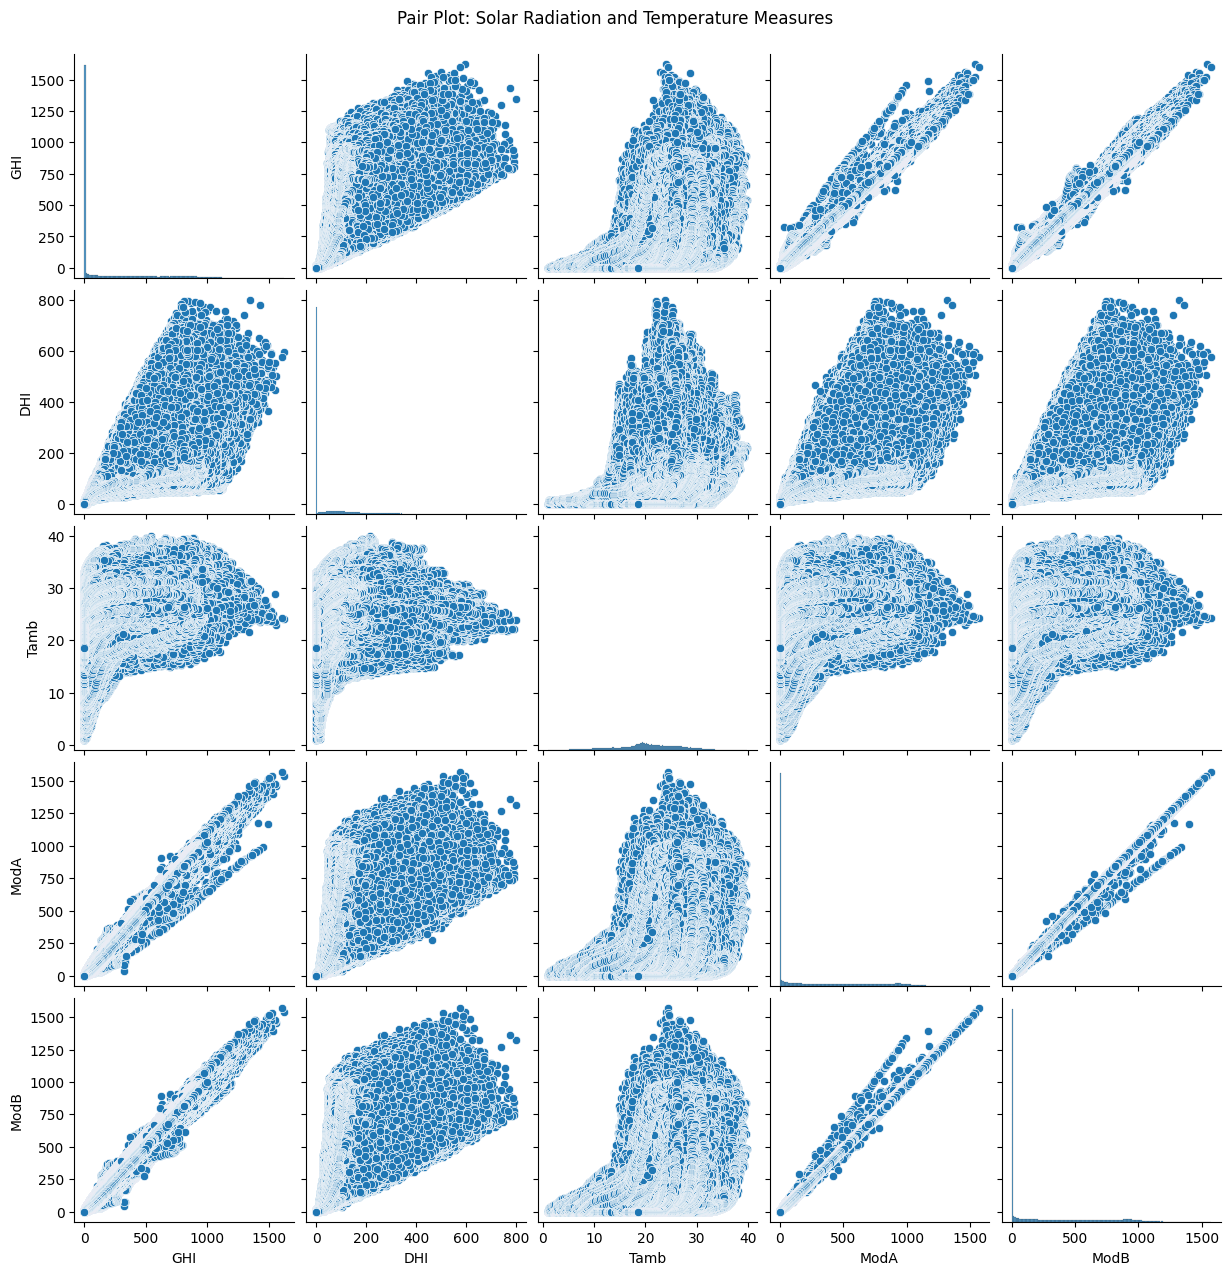

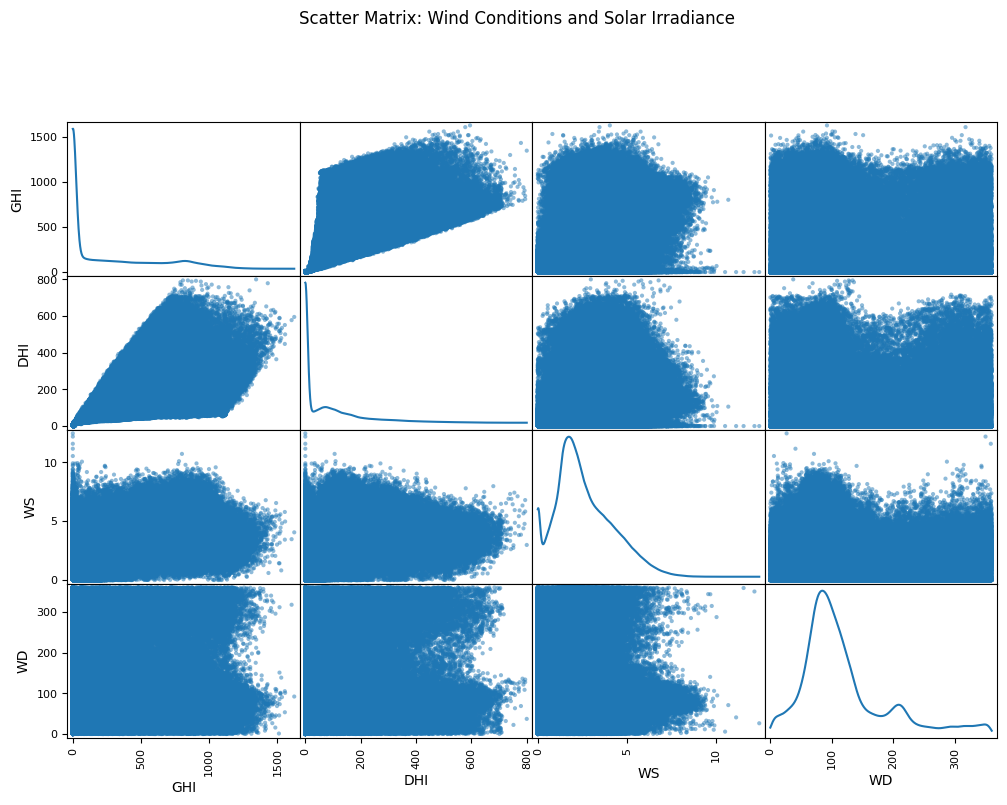

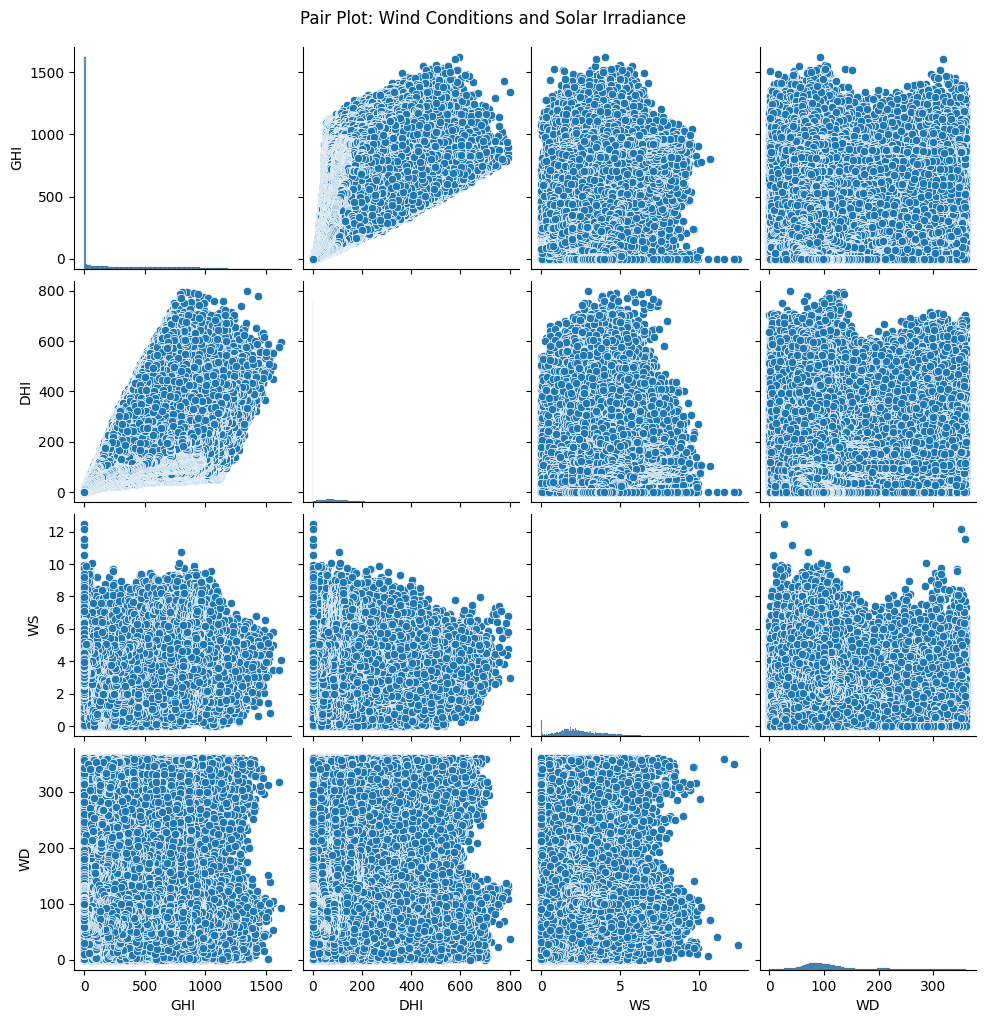

In [57]:

# Calculate the correlation matrix for solar radiation and temperature measures
corr_matrix = csv_data[['GHI', 'DHI', 'Tamb', 'ModA', 'ModB']].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Solar Radiation and Temperature Measures')
plt.show()

# Pair plot to visualize pairwise relationships
sns.pairplot(csv_data[['GHI', 'DHI', 'Tamb', 'ModA', 'ModB']])
plt.suptitle('Pair Plot: Solar Radiation and Temperature Measures', y=1.02)
plt.show()

# Investigate relationship between wind conditions and solar irradiance using scatter plots
scatter_data = csv_data[['GHI', 'DHI', 'WS', 'WD']]
scatter_matrix(scatter_data, figsize=(12, 8), diagonal='kde')
plt.suptitle('Scatter Matrix: Wind Conditions and Solar Irradiance', y=1.02)
plt.show()

# Alternatively, using Seaborn pairplot for wind conditions and solar irradiance
sns.pairplot(csv_data[['GHI', 'DHI', 'WS', 'WD']])
plt.suptitle('Pair Plot: Wind Conditions and Solar Irradiance', y=1.02)
plt.show()



### Wind Analysis

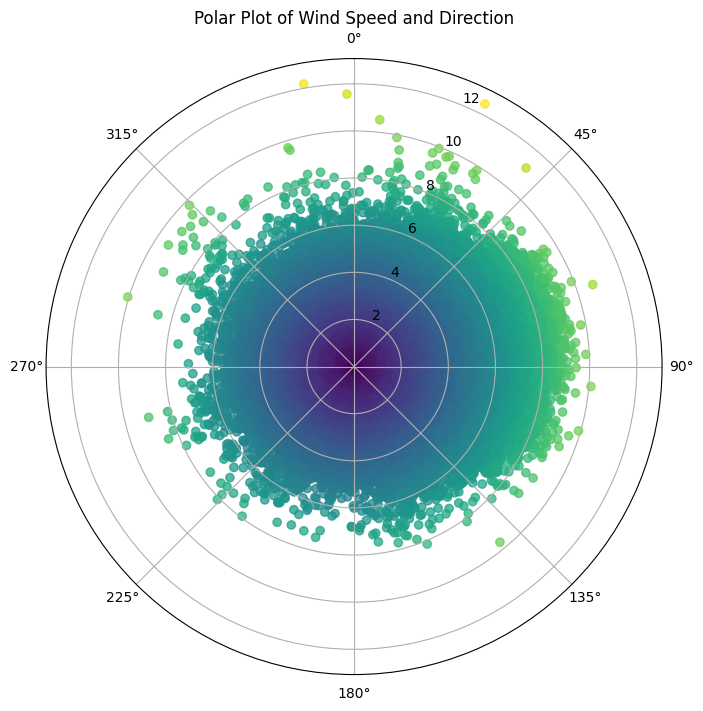

In [58]:

# Convert wind direction from degrees to radians
csv_data['WD_rad'] = np.deg2rad(csv_data['WD'])

# Plot wind direction and speed in a polar plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.scatter(csv_data['WD_rad'], csv_data['WS'], c=csv_data['WS'], cmap='viridis', alpha=0.75)
ax.set_theta_zero_location('N')  # Set 0 degrees to point north
ax.set_theta_direction(-1)  # Set the direction of increasing angles to clockwise
ax.set_title('Polar Plot of Wind Speed and Direction')
plt.show()



### Temperature Analysis

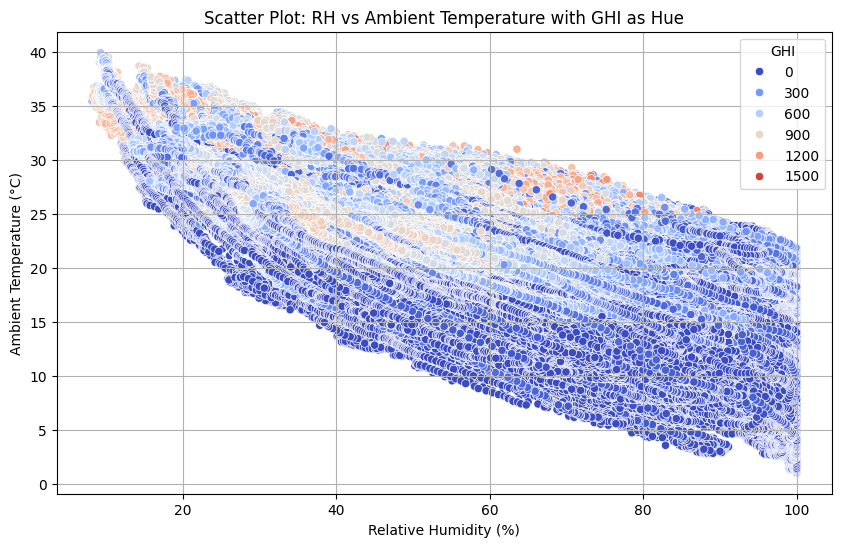

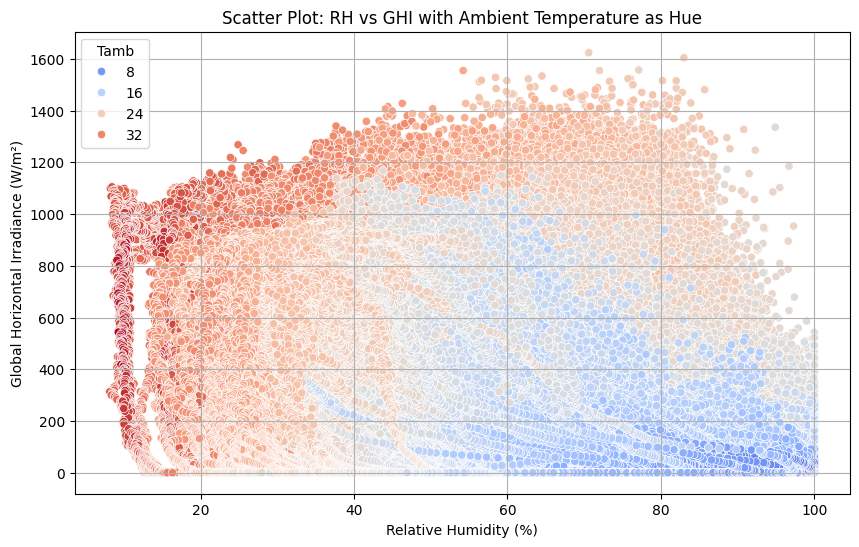

In [59]:
import seaborn as sns



# Scatter plot to examine RH influence on Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RH', y='Tamb', data=csv_data, hue='GHI', palette='coolwarm')
plt.title('Scatter Plot: RH vs Ambient Temperature with GHI as Hue')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.grid(True)
plt.show()

# Scatter plot to examine RH influence on Solar Radiation (GHI)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RH', y='GHI', data=csv_data, hue='Tamb', palette='coolwarm')
plt.title('Scatter Plot: RH vs GHI with Ambient Temperature as Hue')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Global Horizontal Irradiance (W/m²)')
plt.grid(True)
plt.show()


### Histograms

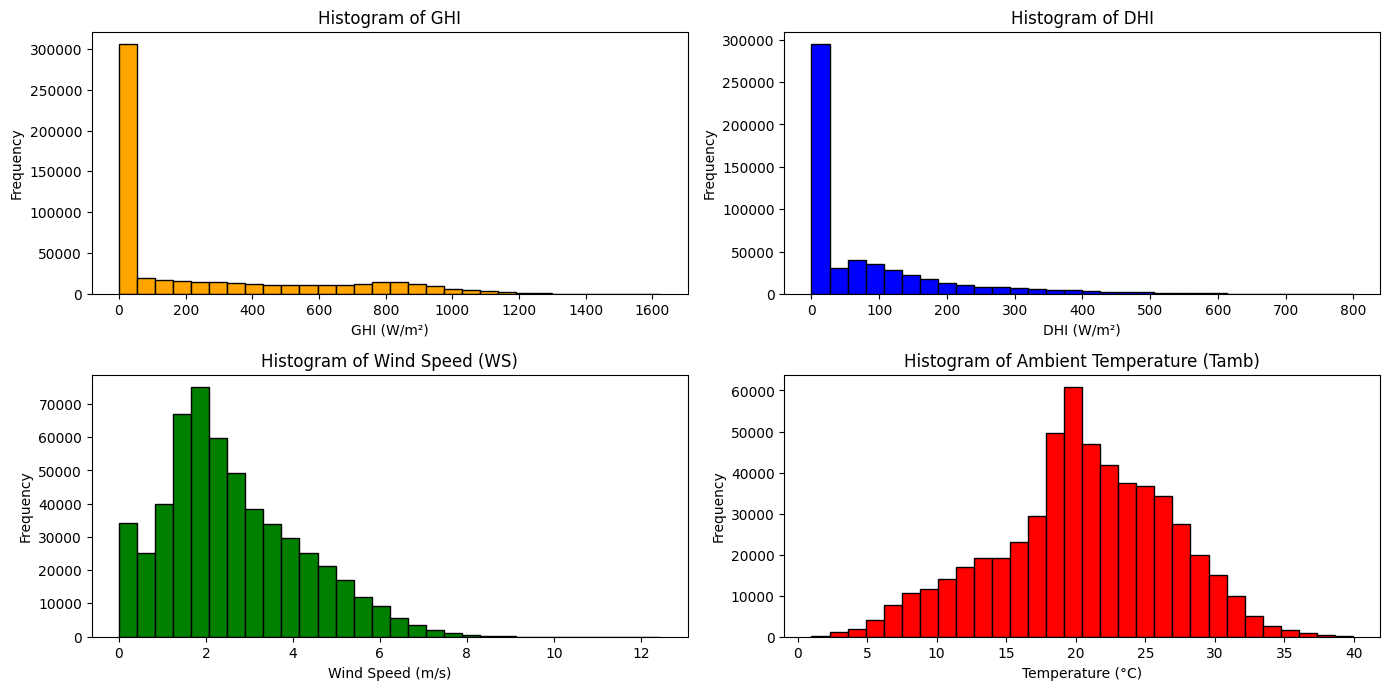

In [60]:
# Histogram for GHI, DHI, and WS
plt.figure(figsize=(14, 10))

# GHI Histogram
plt.subplot(3, 2, 1)
plt.hist(csv_data['GHI'], bins=30, color='orange', edgecolor='black')
plt.title('Histogram of GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')

# DHI Histogram
plt.subplot(3, 2, 2)
plt.hist(csv_data['DHI'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of DHI')
plt.xlabel('DHI (W/m²)')
plt.ylabel('Frequency')

# WS Histogram
plt.subplot(3, 2, 3)
plt.hist(csv_data['WS'], bins=30, color='green', edgecolor='black')
plt.title('Histogram of Wind Speed (WS)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')

# Tamb Histogram
plt.subplot(3, 2, 4)
plt.hist(csv_data['Tamb'], bins=30, color='red', edgecolor='black')
plt.title('Histogram of Ambient Temperature (Tamb)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Z-Score Analysis:

Number of outliers detected per variable:
GHI     0
DHI     0
Tamb    0
ModA    0
ModB    0
WS      0
dtype: int64


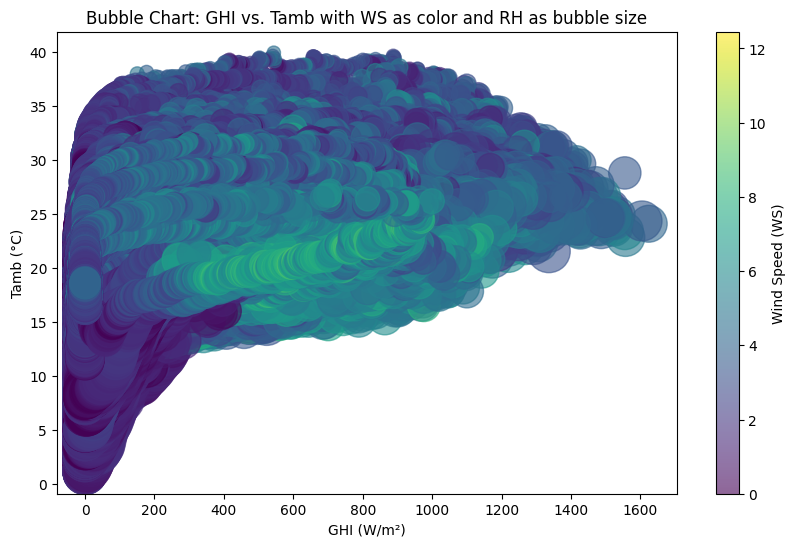

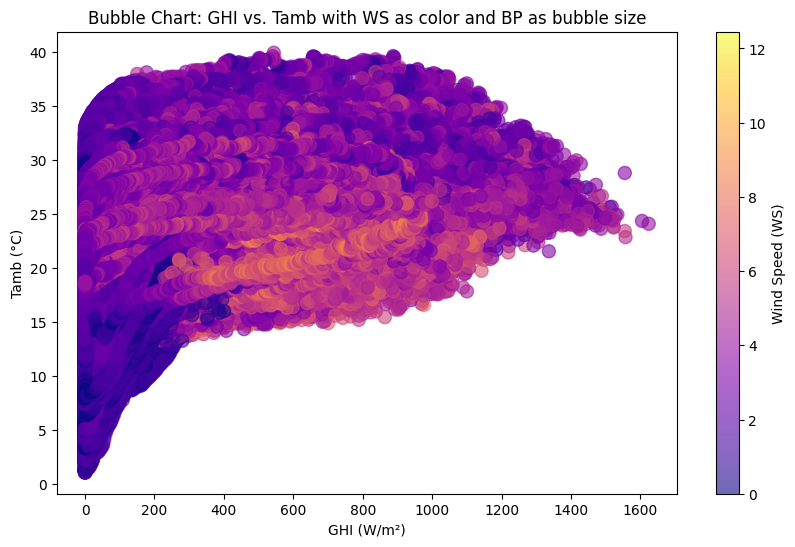

Missing values per column:
DHI                1205
GHI                  26
ghi_pyr_2            26
Tamb                 26
RH                   26
BP                   26
precipitation        26
WS                   26
WD                   26
ModA                 26
ModB                 26
Cleaning             26
comments         548875
WD_rad               26
dtype: int64


C:\Users\MSI\AppData\Local\Temp\ipykernel_4228\1708872041.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['RH'].fillna(data_cleaned['RH'].mean(), inplace=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_4228\1708872041.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

Data cleaning completed. Cleaned dataset saved.


In [61]:

### 1. Z-Score Analysis ###
# Calculate Z-scores for relevant columns (e.g., GHI, DHI, Tamb)
z_scores = csv_data[['GHI', 'DHI', 'Tamb', 'ModA', 'ModB', 'WS']].apply(zscore)

# Flag data points that are significantly different from the mean (e.g., |Z| > 3)
outliers = (z_scores.abs() > 3).sum()
print("Number of outliers detected per variable:")
print(outliers)

# Optionally, remove outliers or investigate them
data_no_outliers = csv_data[(z_scores.abs() <= 3).all(axis=1)]

### 2. Bubble Chart Visualization ###
# Bubble chart: GHI vs. Tamb vs. WS with bubble size representing RH (Relative Humidity)
plt.figure(figsize=(10, 6))
plt.scatter(csv_data['GHI'], csv_data['Tamb'], s=csv_data['RH']*10, c=csv_data['WS'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Wind Speed (WS)')
plt.title('Bubble Chart: GHI vs. Tamb with WS as color and RH as bubble size')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Tamb (°C)')
plt.show()

# Bubble chart: GHI vs. Tamb vs. WS with bubble size representing BP (Barometric Pressure)
plt.figure(figsize=(10, 6))
plt.scatter(csv_data['GHI'], csv_data['Tamb'], s=csv_data['BP']*0.1, c=csv_data['WS'], cmap='plasma', alpha=0.6)
plt.colorbar(label='Wind Speed (WS)')
plt.title('Bubble Chart: GHI vs. Tamb with WS as color and BP as bubble size')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Tamb (°C)')
plt.show()

### 3. csv_data Cleaning ###
# Check for missing values
missing_values = csv_data.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Drop columns with excessive missing values (e.g., 'comments' if entirely null)
data_cleaned = csv_data.drop(columns=['comments'])

# Optionally, fill missing values for certain columns
data_cleaned['RH'].fillna(data_cleaned['RH'].mean(), inplace=True)
data_cleaned['BP'].fillna(data_cleaned['BP'].mean(), inplace=True)

# You can also drop rows with missing data if appropriate
data_cleaned.dropna(inplace=True)

# Save the cleaned data
data_cleaned.to_csv(r'C:\Users\MSI\Documents\start\Solar_Radiation_Measurement_Data_Analysis\dataset\solar_measurements_cleaned.csv')

print("Data cleaning completed. Cleaned dataset saved.")

